In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchinfo as ti
import torchsummary as ts
import torch.optim as optim

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [30]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
iris_df = pd.DataFrame(iris.data, columns = iris['feature_names'])
iris_df['target'] = iris.target

In [32]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
# iris_df = iris_df[iris_df['target'] <= 1].reset_index(drop=True).copy()
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
feature_names_2d = [[iris.feature_names[idx], iris.feature_names[idx+1]] for idx in range(0, len(iris.feature_names), 2)]
feature_names_2d

[['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)']]

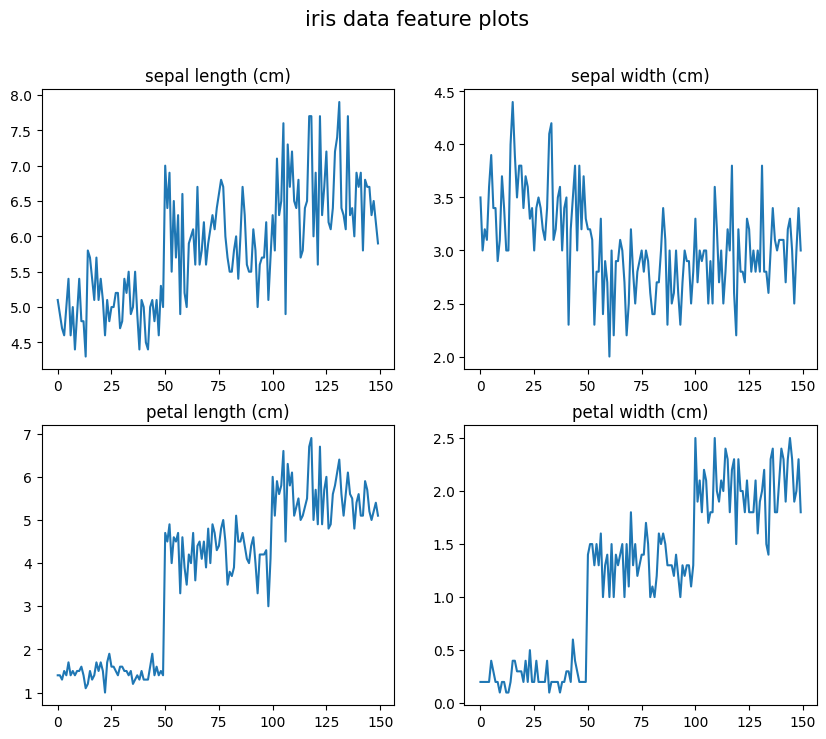

In [35]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i in range(2):
    for j in range(2):
        ax = axs[i][j]
        feature_nm = feature_names_2d[i][j]
        ax.plot(iris_df[feature_nm])
        ax.set_title(feature_nm)
        
fig.suptitle('iris data feature plots', fontsize=15)
plt.show()

In [36]:
# plt.matshow(iris_df, figsize=(12, 9))

In [37]:
iris_df = iris_df.sample(150).reset_index(drop=True).copy()
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.3,2.5,4.9,1.5,1
1,7.6,3.0,6.6,2.1,2
2,4.8,3.1,1.6,0.2,0
3,5.7,4.4,1.5,0.4,0
4,5.6,2.7,4.2,1.3,1
...,...,...,...,...,...
145,6.3,3.4,5.6,2.4,2
146,6.9,3.1,5.4,2.1,2
147,6.7,3.0,5.2,2.3,2
148,7.7,3.8,6.7,2.2,2


In [38]:
# 2. 커스텀 Dataset 클래스 정의
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        # 특성과 타겟 데이터를 텐서로 변환하여 저장
        self.features = torch.tensor(dataframe.iloc[:, :-1].values, dtype=torch.float32)
        self.labels = torch.tensor(dataframe['target'].values, dtype=torch.long)
        
    def __len__(self):
        # 전체 데이터셋의 길이 반환
        return len(self.features)
    
    def __getitem__(self, idx):
        # 인덱스를 받아 해당하는 데이터와 라벨을 반환
        return self.features[idx], self.labels[idx]

# 3. Dataset 객체 생성 및 확인
custom_dataset = CustomDataset(iris_df)

# 예시로 첫 번째 데이터 확인
print(custom_dataset[0])

(tensor([6.3000, 2.5000, 4.9000, 1.5000]), tensor(1))


In [39]:
custom_dataset[0][0].shape

torch.Size([4])

In [40]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, shuffle=True)
train_x, test_x, train_y, test_y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 43                 5.8               2.7                4.1               1.0
 83                 5.1               3.3                1.7               0.5
 102                6.4               3.2                5.3               2.3
 149                6.0               3.0                4.8               1.8
 126                5.6               3.0                4.5               1.5
 ..                 ...               ...                ...               ...
 29                 5.6               2.5                3.9               1.1
 90                 6.7               3.3                5.7               2.5
 114                6.3               2.7                4.9               1.8
 48                 7.1               3.0                5.9               2.1
 69                 6.1               3.0                4.9               1.8
 
 [135 rows x 4 columns],
      sepal length (cm)  

In [41]:
f_train_x, val_x, f_train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, shuffle=True)

In [42]:
f_train_x.shape, val_x.shape, test_x.shape

((121, 4), (14, 4), (15, 4))

In [43]:
f_train_y.shape, val_y.shape, test_y.shape

((121,), (14,), (15,))

In [44]:
train_dataset = CustomDataset(pd.concat([f_train_x, f_train_y], axis=1))
train_dataset[0]

(tensor([5.0000, 3.3000, 1.4000, 0.2000]), tensor(0))

In [45]:
val_dataset = CustomDataset(pd.concat([val_x, val_y], axis=1))
test_dataset = CustomDataset(pd.concat([test_x, test_y], axis=1))

In [46]:
len(train_dataset), len(val_dataset), len(test_dataset)

(121, 14, 15)

In [213]:
BATCH_SIZE = 16
train_DL = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_DL = torch.utils.data.DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_DL = torch.utils.data.DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = True)

In [233]:
class Linear(nn.Module):
    def __init__(self, input_dim, output_dim, batchnorm=False):
        super(Linear, self).__init__()
        
        self.batchnorm = batchnorm
        
        if batchnorm:
            self.Linear = nn.Sequential(
                nn.Linear(in_features=input_dim, out_features=16, bias=False),
                nn.BatchNorm1d(16),
                nn.ReLU(),
                nn.Linear(in_features=16, out_features=32, bias=False),
                nn.BatchNorm1d(32),
                nn.Linear(32, 16, bias=False),
                nn.BatchNorm1d(16),
                nn.Linear(16, output_dim, bias=False)
            )
        else:
            self.Linear = nn.Sequential(
                nn.Linear(input_dim, 16, bias=False),
                nn.ReLU(),
                nn.Linear(16, 32, bias=False),
                nn.Linear(32, 16, bias=False),
                nn.Linear(16, output_dim, bias=False)
            )
    
    def forward(self, x):
        if self.batchnorm:
            # 입력 데이터가 2D 형태인지 확인
            if len(x.shape) != 2:
                raise ValueError(f"Expected input to have 2 dimensions, but got {x.shape}")
            return self.Linear(x)
        else:
            out = self.Linear(x)
            return out

In [234]:
model = Linear(input_dim=4, output_dim=3, batchnorm=True)
model

Linear(
  (Linear): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=False)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=32, bias=False)
    (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Linear(in_features=32, out_features=16, bias=False)
    (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=16, out_features=3, bias=False)
  )
)

In [235]:
features = torch.rand(16, 4)
features.shape

torch.Size([16, 4])

In [236]:
model(features)

tensor([[-0.1359,  0.1756,  0.4712],
        [ 0.0075, -0.0721, -0.7948],
        [ 0.1021,  1.2646, -0.0088],
        [ 0.0427,  2.4922, -0.1291],
        [-0.1098, -0.7414,  0.2521],
        [-0.4723,  0.2647,  0.0667],
        [ 0.1778, -0.1692, -0.2328],
        [ 0.2100, -1.5096, -0.1763],
        [ 0.0345,  0.8134, -0.2271],
        [-0.0199, -0.2509,  0.1043],
        [ 0.2737, -1.1061,  0.1174],
        [ 0.1196, -0.4619, -0.2660],
        [ 0.0536,  0.7330,  0.0579],
        [-0.0718, -0.6205,  0.1348],
        [-0.0912, -0.8162,  0.3584],
        [-0.1205,  0.0045,  0.2720]], grad_fn=<MmBackward0>)

In [226]:
# ti.summary(model), ts.summary(model, input_size=(8, 4))

In [237]:
model(next(iter(train_DL))[0])

tensor([[ 0.3127, -0.7056, -0.3673],
        [-0.2941,  0.6096,  0.2185],
        [ 0.0320, -0.6548,  0.2735],
        [-0.0051, -0.9086,  0.2501],
        [ 0.0797, -0.3052,  0.3716],
        [-0.0880,  0.4565, -0.2201],
        [ 0.1678,  0.7093, -0.2116],
        [-0.0672, -0.2120,  0.2559],
        [ 0.1688, -0.9647, -0.3459],
        [-0.1093,  1.0897, -0.0772],
        [-0.0895,  0.3030, -0.3877],
        [ 0.1291, -0.2933,  0.3559],
        [-0.2013,  2.1594, -0.1339],
        [-0.1701, -0.2650,  0.3255],
        [-0.0694,  0.6362, -0.1872],
        [ 0.2040, -1.6548, -0.1201]], grad_fn=<MmBackward0>)

In [238]:
lr = 1e-4
EPOCH = 100

optimizer = optim.Adam(model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()

model = model.to('mps')

hist_train_loss = []
hist_train_acc = []

hist_val_loss = []
hist_val_acc = []

for ep in range(EPOCH):
    rloss = 0 # running loss
    rcorrect = 0 # running correct
    model.train() # train mode로 전환
    for i, (x_batch, y_batch) in enumerate(train_DL):
        x_batch = x_batch.to('mps')
        y_batch = y_batch.to('mps')
        # inference
        y_hat = model(x_batch)
        # loss
        loss = criterion(y_hat, y_batch)
        # update
        optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
        loss.backward() # backpropagation
        optimizer.step() # weight update
        # loss accumulation
        loss_b = loss.item()
        rloss += loss_b
        
        # accuracy accumulation
        pred = y_hat.argmax(dim=1)
        corrects_b = torch.sum(pred == y_batch).item()
        rcorrect += corrects_b / x_batch.shape[0] * 100
    
    hist_train_loss.append(rloss/len(f_train_x))
    hist_train_acc.append(rcorrect/len(train_DL))
#         print(corrects_b / x_batch.shape[0] * 100, pred, y_batch, rcorrect)
    
    val_loss = 0
    val_acc = 0
    model.eval()
    for i, (x_val, y_val) in enumerate(val_DL):
        x_val = x_val.to('mps')
        y_val = y_val.to('mps')
        
        with torch.no_grad():
            y_val_hat = model(x_val)
            loss = criterion(y_val_hat, y_val)
        
        loss_b = loss.item()
        val_loss += loss_b
        
        
        val_pred = y_val_hat.argmax(dim=1)
        corrects_b = torch.sum(val_pred == y_val).item()
        val_acc += corrects_b / x_val.shape[0] * 100
    
    hist_val_loss.append(val_loss/len(val_x))
    hist_val_acc.append(val_acc/len(val_DL))
    
    print(f"Epoch: {ep+1}, train loss: {round(rloss/len(f_train_x),3)}, train accuracy: {round(rcorrect/len(train_DL),1)} %")
    print(f'val loss : {round(val_loss/len(val_x), 3)}, val acc : {round(val_acc/len(val_DL), 3)}%')
    print("-"*20)

Epoch: 1, train loss: 0.074, train accuracy: 51.7 %
val loss : 0.075, val acc : 78.571%
--------------------
Epoch: 2, train loss: 0.069, train accuracy: 54.0 %
val loss : 0.069, val acc : 71.429%
--------------------
Epoch: 3, train loss: 0.066, train accuracy: 58.5 %
val loss : 0.066, val acc : 71.429%
--------------------
Epoch: 4, train loss: 0.061, train accuracy: 66.0 %
val loss : 0.064, val acc : 64.286%
--------------------
Epoch: 5, train loss: 0.059, train accuracy: 64.0 %
val loss : 0.062, val acc : 64.286%
--------------------
Epoch: 6, train loss: 0.055, train accuracy: 74.6 %
val loss : 0.061, val acc : 71.429%
--------------------
Epoch: 7, train loss: 0.053, train accuracy: 73.0 %
val loss : 0.059, val acc : 71.429%
--------------------
Epoch: 8, train loss: 0.052, train accuracy: 71.4 %
val loss : 0.057, val acc : 71.429%
--------------------
Epoch: 9, train loss: 0.047, train accuracy: 76.0 %
val loss : 0.055, val acc : 71.429%
--------------------
Epoch: 10, train lo

Epoch: 80, train loss: 0.019, train accuracy: 93.0 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 81, train loss: 0.019, train accuracy: 94.1 %
val loss : 0.017, val acc : 92.857%
--------------------
Epoch: 82, train loss: 0.015, train accuracy: 93.9 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 83, train loss: 0.014, train accuracy: 97.8 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 84, train loss: 0.017, train accuracy: 94.5 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 85, train loss: 0.018, train accuracy: 93.9 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 86, train loss: 0.013, train accuracy: 98.4 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 87, train loss: 0.014, train accuracy: 98.4 %
val loss : 0.018, val acc : 92.857%
--------------------
Epoch: 88, train loss: 0.026, train accuracy: 84.1 %
val loss : 0.018, val acc : 85.714%
--------------------
Epoch: 89,

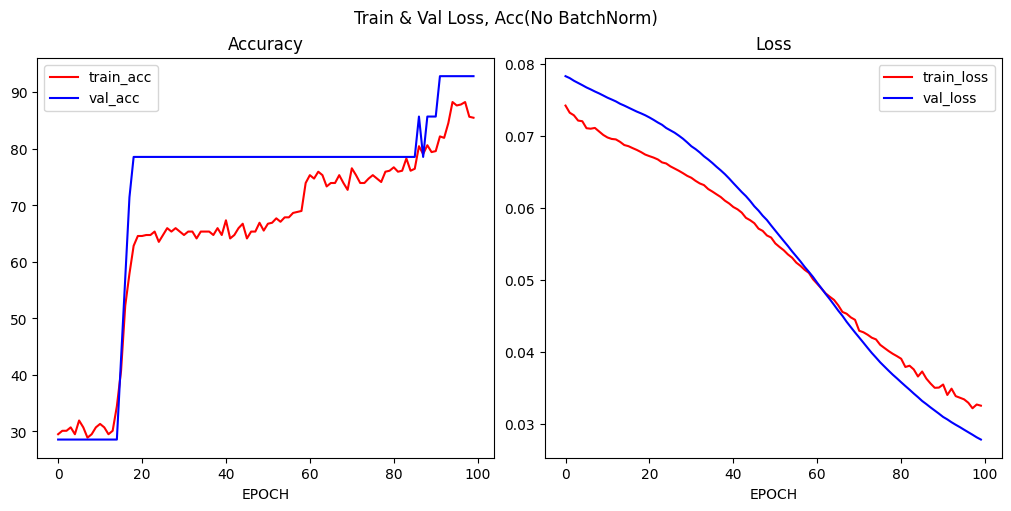

In [229]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

ax1 = axs[0]
ax1.plot(hist_train_acc, label = 'train_acc', color='r')
ax1.plot(hist_val_acc, label = 'val_acc', color='b')
ax1.set_title('Accuracy')
ax1.set_xlabel('EPOCH')
ax1.legend()

ax2 = axs[1]
ax2.plot(hist_train_loss, label = 'train_loss', color='r')
ax2.plot(hist_val_loss, label = 'val_loss', color='b')
ax2.set_title('Loss')
ax2.set_xlabel('EPOCH')
ax2.legend()

fig.suptitle('Train & Val Loss, Acc(No BatchNorm)')
plt.show()

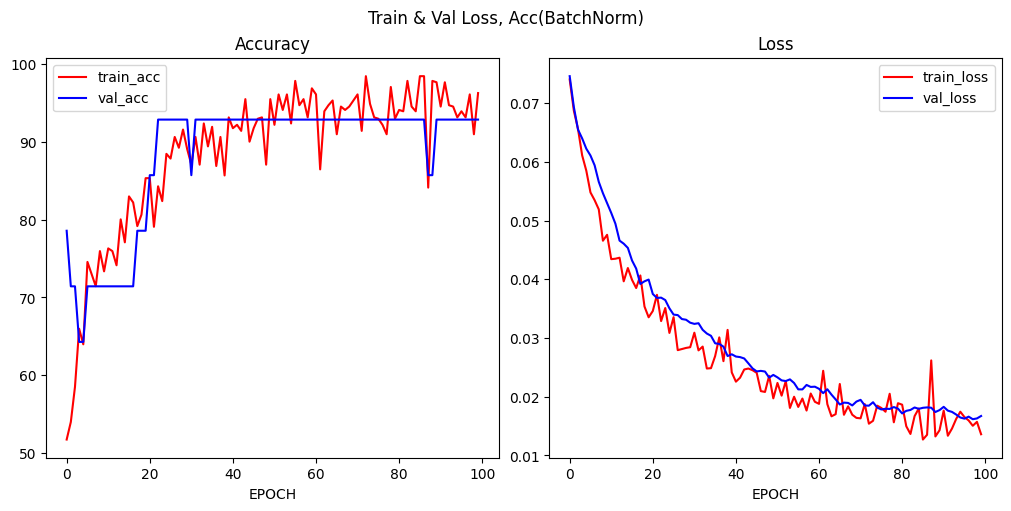

In [239]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

ax1 = axs[0]
ax1.plot(hist_train_acc, label = 'train_acc', color='r')
ax1.plot(hist_val_acc, label = 'val_acc', color='b')
ax1.set_title('Accuracy')
ax1.set_xlabel('EPOCH')
ax1.legend()

ax2 = axs[1]
ax2.plot(hist_train_loss, label = 'train_loss', color='r')
ax2.plot(hist_val_loss, label = 'val_loss', color='b')
ax2.set_title('Loss')
ax2.set_xlabel('EPOCH')
ax2.legend()

fig.suptitle('Train & Val Loss, Acc(BatchNorm)')
plt.show()

In [240]:
model.eval()

test_loss = 0
test_acc = 0

for i, (x_test, y_test) in enumerate(test_DL):
    
    x_test = x_test.to('mps')
    y_test = y_test.to('mps')
    
    with torch.no_grad():
        y_test_hat = model(x_test)
        loss = criterion(y_test_hat, y_test)
        
    loss_b = loss.item()
    test_loss += loss_b
    test_pred = y_test_hat.argmax(dim=1)

    corrects_b = torch.sum(test_pred == y_test).item()
    test_acc += corrects_b / x_test.shape[0] * 100
    
print(f'val loss : {round(test_loss/len(x_test), 3)}, val acc : {round(test_acc/len(test_DL), 3)}%')
# No BatchNorm : val loss : 0.042, val acc : 86.667%
# BatchNorm val loss : 0.023, val acc : 93.333%

val loss : 0.023, val acc : 93.333%


In [241]:
y_test_hat = model(x_test)
y_test_hat.argmax(dim=1)

tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')

In [242]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')